,Filename,tasks,buffers,sumqt,sumphit,sumnt,sumki,SPeriodic,1Periodic,KPeriodic
11,AGB5CSDF/autogen1,90,617,183420,126,250992,NaN,NaN,4.845521e-08,NaN
10,AGB5CSDF/autogen2,70,473,15081497,196,41331062,NaN,NaN,1.555722e-11,NaN
13,AGB5CSDF/autogen3,154,671,127913273,368,308818852,NaN,NaN,4.759341e-13,NaN
14,AGB5CSDF/autogen4,2426,2900,23330,5422,51301,2437.0,2.083333e-02,2.678571e-02,2.777778e-02
12,AGB5CSDF/autogen5,2767,4894,208907,4167,312485,32163.0,5.254309e-05,5.254309e-05,2.439024e-03
2,IB5CSDF/BlackScholes,41,40,923,261,2379,41.0,1.790770e-08,2.377932e-08,2.377932e-08
1,IB5CSDF/BlackScholes_sized,41,80,923,261,2379,44.0,6.216107e-09,1.532239e-08,1.551065e-08
4,IB5CSDF/Echo,38,82,35003,45,42003,38.0,4.055366e-11,1.963012e-10,1.963012e-10
8,IB5CSDF/Echo_sized,38,164,35003,45,42003,35003.0,4.055366e-11,5.473867e-11,1.666062e-10
5,IB5CSDF/H264,666,3128,762,1375,1471,666.0,NaN,4.200216e-06,4.200216e-06


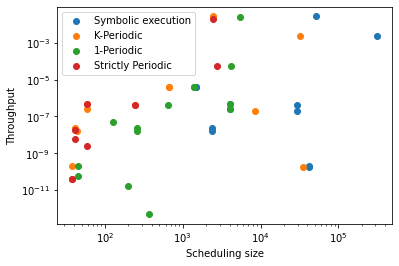

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("./logs/speriodic_benchmark_throughput.log", sep=";").sort_values(by="Filename")
df = df.fillna(-1)
df[ ["sumki", "SPeriodic" , "1Periodic" , "KPeriodic"]] = df[ ["sumki", "SPeriodic" , "1Periodic" , "KPeriodic"]].where(df[ ["sumki", "SPeriodic" , "1Periodic" , "KPeriodic"]] >= 0, np.nan)


df["Filename"] = df["Filename"].replace(".+//(.*).xml","\\1", regex=True)
df

plt.scatter (df["sumnt"], df["KPeriodic"], label="Symbolic execution")
plt.scatter (df["sumki"], df["KPeriodic"], label="K-Periodic")
plt.scatter (df["sumphit"], df["1Periodic"], label="1-Periodic")
plt.scatter (df["tasks"], df["SPeriodic"], label="Strictly Periodic")
plt.yscale("log")
plt.xscale("log")

plt.xlabel("Scheduling size")
plt.ylabel("Throughput")

plt.legend()
df

In [73]:
newnames = {"Filename": "Graph", 
             "tasks": "#tasks", 
             "buffers": "#buffers", 
             "SPeriodic": "Strictly Periodic", 
             "1Periodic": "1-Periodic", 
             "KPeriodic": "K-Periodic",
           "sumnt" : 'Complexity'}


rdf = df.rename(columns=newnames)
rdf = rdf.drop(columns=["sumqt", "sumphit", "sumki"])
colformat = '|'.join([''] + ['l'] * rdf.index.nlevels + ['r'] * rdf.shape[1] + [''])
latex = rdf.to_latex(float_format="{:0.2E}".format, column_format=colformat, index=False)
#.replace('\\\\\n', '\\\\ \\midrule\n').replace("  ", " ").replace("  ", " ").replace("  ", " ")
print(latex)

\begin{tabular}{|l|r|r|r|r|r|r|r|}
\toprule
                      Graph &  \#tasks &  \#buffers &  Complexity &  Strictly Periodic &  1-Periodic &  K-Periodic \\
\midrule
          AGB5CSDF/autogen1 &      90 &       617 &      250992 &          -1.38E-06 &    4.85E-08 &         NAN \\
          AGB5CSDF/autogen2 &      70 &       473 &    41331062 &          -1.64E-09 &    1.56E-11 &         NAN \\
          AGB5CSDF/autogen3 &     154 &       671 &   308818852 &          -3.02E-10 &    4.76E-13 &         NAN \\
          AGB5CSDF/autogen4 &    2426 &      2900 &       51301 &           2.08E-02 &    2.68E-02 &    2.78E-02 \\
          AGB5CSDF/autogen5 &    2767 &      4894 &      312485 &           5.25E-05 &    5.25E-05 &    2.44E-03 \\
       IB5CSDF/BlackScholes &      41 &        40 &        2379 &           1.79E-08 &    2.38E-08 &    2.38E-08 \\
 IB5CSDF/BlackScholes\_sized &      41 &        80 &        2379 &           6.22E-09 &    1.53E-08 &    1.55E-08 \\
               I